# Week 5 Assignment

Rishav Chaudhary

Presidential Graduate School, Kathmandu, Nepal

PRG330: Python Programming for Data

Prof. Tek Raj Panta

November 25, 2024


# Group D: Predicting Heart Disease Risk

## Loading the DataSet
Since, the zip file downloaded contained, many plain files in format .data, it was better for to import the dataset directly from the ucimlrepo. This was the option available. So, for this assignment, the virtual environment was created. Then through ``pip install ucimlrepo`` command, we installed it in virtual environment. Then, as per loading dataset, we imported ``fetch_ucirepo`` from ``ucimlrepo``. 

Now, came for fetching dataset which was with ``id=45``. The ``fetch_ucirepo`` function with parameter ``id=45`` was called and stored in variable ``heart_disease``. When, the variable was printed, it was found to be an dictionary or a object just how a json file is. Within curly braces, there were further curly braces indicating this was an object. The inside key ``data``, there was a value as a dictionary. Inside this dictionary, there was ``ids`` as None, ``features`` as ``age, sex, chol`` and many more and key ``targets`` had ``num`` which corresponded to target variable. One thing, i was able to notice is that, the value of ``features`` and ``targets`` were in form of dataframe. So, the entire meaning of loading dataset as pd.DataFrame did not had to be done. And, Same code was displayed even while trying to import and load it.

In [13]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
  
# fetching dataset 
heart_disease = fetch_ucirepo(id=45) 

# data loading as pandas dataframes 
X = heart_disease.data.features 
y = heart_disease.data.targets 
print(y.mean())
# metadata 
print(heart_disease.metadata)  


num    0.937294
dtype: float64
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detra

In [14]:
# printing variables
print(heart_disease.variables)

        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

## Understanding Features

In [15]:
print(X.info())
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 30.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     303 non-null    int64
dtypes: int64(1)
memory usage: 2.5 KB
None


From, here, we can understand that the dataset includes 13 features related to patient characteristics, and one target column ``num`` which indicated the presence of heart disease.

## Data Preprocessing
As per the question, data preprocessing here will involve two parts:
- **Handling Missing Values**: We will handle it using the mean for the continuous variables.
- **Normalization**: We will scale it from 0 to 1 for normalization.

In [16]:
# Concatenating the features and target as one variable
features_target_dataframe = pd.concat([X, y], axis=1)

# Checking for missing values
print(features_target_dataframe.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


Yes, there are missing values, so will fill it with mean values.

In [17]:
# Fill missing values
features_target_dataframe.fillna(features_target_dataframe.mean(), inplace=True)

# Filling missing values for target, and features
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

/tmp/ipykernel_195079/1404111085.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(X.mean(), inplace=True)
/tmp/ipykernel_195079/1404111085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(y.mean(), inplace=True)


## Exploratory Data Analysis
EDA includes checking distributions, correlation, and feature importance.

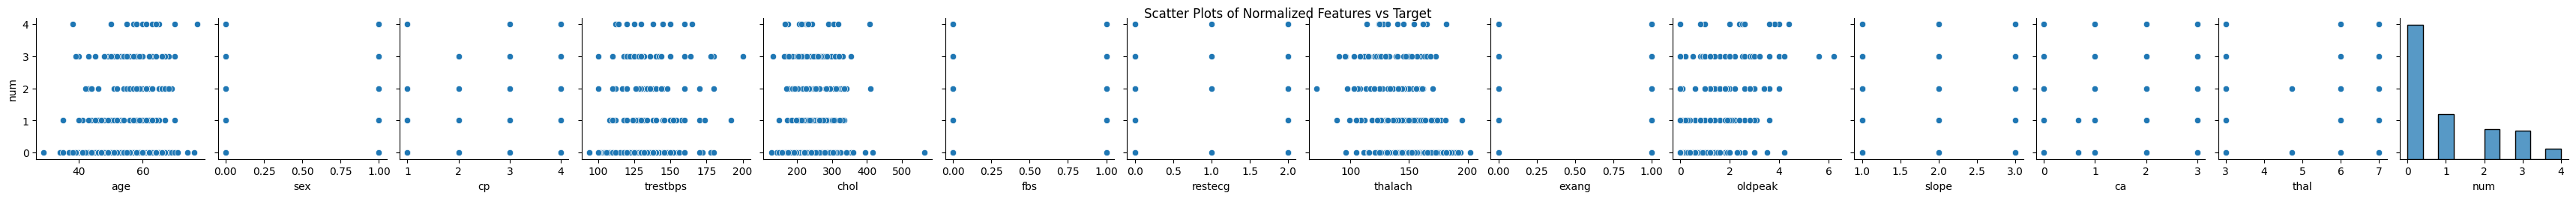

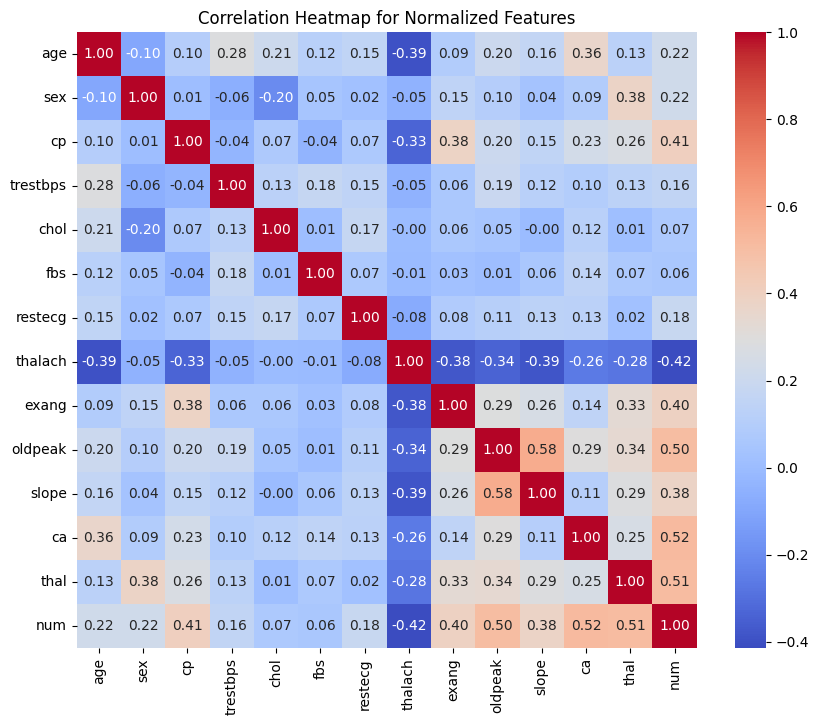

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot
sns.pairplot(
    data=features_target_dataframe,
    x_vars=features_target_dataframe.columns,  # Limit to first 5 features for visualization
    y_vars=["num"],  # Use the target column for comparison
    kind="scatter"
)
plt.suptitle("Scatter Plots of Normalized Features vs Target", y=1.02)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 8))  
sns.heatmap(
    features_target_dataframe.corr(),  
    cmap="coolwarm",
    annot=True,
    fmt=".2f"
)
plt.title("Correlation Heatmap for Normalized Features")
plt.show()


## Building Multiple Linear Regression Model
### Training_testing model

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Building Model

In [20]:
from sklearn.linear_model import LinearRegression

# Initialize the model
nums_model = LinearRegression()
# fit data to the model
nums_model.fit(X_train, y_train) 

# Print the coefficients 
print("Coefficients:", nums_model.coef_)
print("Intercept:", nums_model.intercept_)

Coefficients: [[-0.00595963  0.2203485   0.21778198  0.0051293   0.00097626  0.01390767
   0.08256561 -0.00394474  0.26427221  0.19558677  0.1612509   0.42429947
   0.115767  ]]
Intercept: [-1.37190618]


### Evaluating Model

In [21]:
from sklearn.metrics import mean_squared_error
# Make predictions
y_pred = nums_model.predict(X_test)

# Evaluate the model 
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 1/2
print("Mean Squared Error:", mse,rmse)

Mean Squared Error: 0.7171140551177827 0.35855702755889135


### Inferences (Use model in real-world)

In [22]:
import numpy as np
import warnings

# Suppress warnings globally
warnings.filterwarnings("ignore", category=UserWarning)

# Real-world input values for the features
age = 60
sex = 1  # Male = 1, Female = 0
cp = 3   # Chest pain type (e.g., typical, atypical, etc.)
restbps = 140
chol = 240
fbs = 0  # Fasting blood sugar > 120 mg/dL (1 = True, 0 = False)
restecg = 1  # Resting electrocardiographic results
thalach = 150  # Maximum heart rate achieved
exang = 0  # Exercise-induced angina (1 = Yes, 0 = No)
oldpeak = 1.5  # ST depression induced by exercise relative to rest
slope = 2  # Slope of the peak exercise ST segment
ca = 0  # Number of major vessels (0-3) colored by fluoroscopy
thal = 2  # Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)

# Combining all features into a single array (row vector)
single_data = np.array([age, sex, cp, restbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]).reshape(1, -1)

# Use the trained nums_model to predict the target (num)
single_prediction = nums_model.predict(single_data)

# Display the prediction
print(f"Input Features: {single_data}")
print(f"Predicted Num: {single_prediction[0]}")

predicted_num = single_prediction[0]

if predicted_num < 1:
    predicted_num_class = 0
elif predicted_num < 2:
    predicted_num_class = 1
elif predicted_num < 3:
    predicted_num_class = 2
elif predicted_num < 4:
    predicted_num_class = 3
else:
    predicted_num_class = 4
predicted_num = predicted_num[0]
print(f"Predicted Num Class: {predicted_num_class} (after rounding up)")
print(f"Predicted percentage of having heart disease: {(predicted_num/5)*100} %")



Input Features: [[ 60.    1.    3.  140.  240.    0.    1.  150.    0.    1.5   2.    0.
    2. ]]
Predicted Num: [0.43488522]
Predicted Num Class: 0 (after rounding up)
Predicted percentage of having heart disease: 8.697704321675115 %


The predicted value 0.43488522 will be rounded since, the num value is integer but act as categorical. 0 is treated as low risk and 4 as high risk. So, the chance of having heart-disease in this scenario is null. Still, there is 8.69% of having heart-disease in the above mentioned scenario.